<a href="https://colab.research.google.com/github/Fikaaw/quantitative-finance/blob/main/sentiment_analysis_on_financial_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use NLP techniques to analyze financial news and tweets, and integrate sentiment scores into trading strategies.

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed


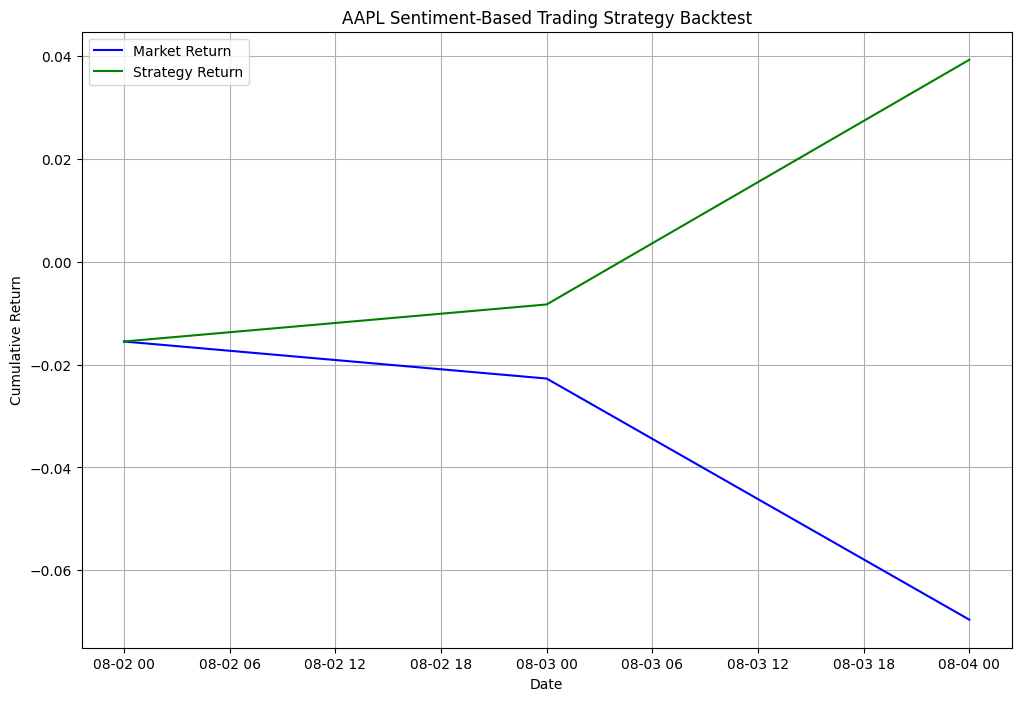

Final Market Return: -0.07
Final Strategy Return: 0.04


In [ ]:
import pandas as pd
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Step 1: Sample Financial News Data (you can replace this with actual news scraping)
news_data = pd.DataFrame({
    'Date': ['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04'],
    'Headline': [
        'Apple stock rises on strong earnings report',
        'Market fears grow amid recession concerns',
        'Tech stocks tumble as investors worry about valuation',
        'Apple announces new product line boosting investor confidence'
    ]
})

news_data['Date'] = pd.to_datetime(news_data['Date'])

# Step 2: Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Step 3: Apply Sentiment Analysis
news_data['Sentiment'] = news_data['Headline'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Step 4: Download Stock Price Data
ticker = "AAPL"
stock_data = yf.download(ticker, start="2023-08-01", end="2023-08-05")
stock_data = stock_data.reset_index()  # Reset the index to make 'Date' a regular column


# Step 5: Merge Sentiment Scores with Stock Data
merged_data = pd.merge(stock_data, news_data, on='Date', how='left')
merged_data['Sentiment'].fillna(0, inplace=True)

# Step 6: Trading Strategy Based on Sentiment
merged_data['Signal'] = merged_data['Sentiment'].apply(lambda x: 1 if x > 0 else -1)
merged_data['Strategy Return'] = merged_data['Signal'].shift(1) * (merged_data['Adj Close'].pct_change())

# Step 7: Calculate Cumulative Returns
merged_data['Market Return'] = merged_data['Adj Close'].pct_change()
merged_data['Cumulative Market Return'] = (1 + merged_data['Market Return']).cumprod() - 1
merged_data['Cumulative Strategy Return'] = (1 + merged_data['Strategy Return']).cumprod() - 1

# Step 8: Plot the Results
plt.figure(figsize=(12, 8))
plt.plot(merged_data['Date'], merged_data['Cumulative Market Return'], label='Market Return', color='blue')
plt.plot(merged_data['Date'], merged_data['Cumulative Strategy Return'], label='Strategy Return', color='green')
plt.title(f'{ticker} Sentiment-Based Trading Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Print final cumulative returns
print(f"Final Market Return: {merged_data['Cumulative Market Return'].iloc[-1]:.2f}")
print(f"Final Strategy Return: {merged_data['Cumulative Strategy Return'].iloc[-1]:.2f}")


Penjelasan Kode:
*   Sample Financial News Data: Contoh data berita keuangan digunakan di sini, yang dapat digantikan dengan hasil scraping dari situs berita atau API.
*   Sentiment Analysis: VADER digunakan untuk menganalisis sentimen dari judul berita. Skor sentimen disimpan dalam kolom Sentiment.
Download Stock Price Data: Data harga saham Apple (AAPL) diunduh menggunakan yfinance.
Integrate Sentiment Scores: Skor sentimen digabungkan dengan data harga saham berdasarkan tanggal.
*   Trading Strategy Based on Sentiment: Sinyal perdagangan dibuat berdasarkan skor sentimen. Jika skor positif, beli saham; jika negatif, jual saham.
*   Calculate Cumulative Returns: Return kumulatif dihitung untuk strategi berdasarkan sentimen dan dibandingkan dengan return pasar.
Plot the Results: Grafik menunjukkan perbandingan antara kinerja strategi berbasis sentimen dan kinerja pasar.

*   Output:
Grafik akan menunjukkan perbandingan antara kinerja strategi perdagangan berbasis sentimen dan kinerja pasar. Nilai akhir dari return kumulatif akan dicetak di terminal.

Anda dapat memperluas proyek ini dengan menambahkan lebih banyak sumber data berita, menerapkan teknik NLP lebih lanjut (seperti LDA untuk topik analisis), atau mengembangkan strategi perdagangan yang lebih kompleks.